In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('Brazil Humidity.csv', index_col=0, parse_dates=True)
df.index.freq = 'D'
df.head()

,Cases,Relative Humidity
Date,,
2020-03-04,1,74.270646
2020-03-05,4,77.438018
2020-03-06,6,78.456465
2020-03-07,6,79.042920
2020-03-08,6,72.096827


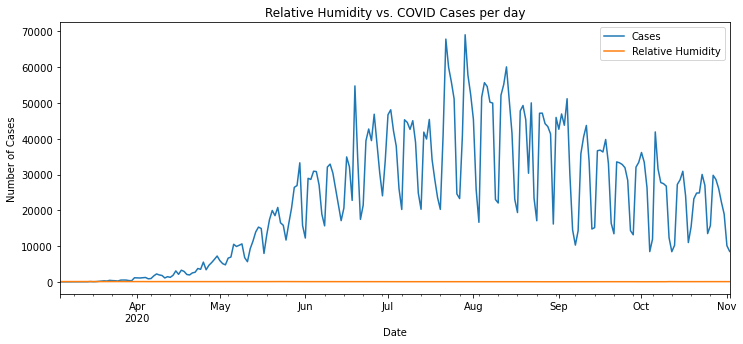

In [3]:
title = 'Relative Humidity vs. COVID Cases per day'
ylabel='Number of Cases'
xlabel=''

ax = df['Cases'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df['Relative Humidity'].plot(legend=True);

In [4]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [5]:
adf_test(df['Cases'],title='Cases')

Augmented Dickey-Fuller Test: Cases
ADF test statistic       -1.581012
p-value                   0.493124
# lags used              15.000000
# observations          228.000000
critical value (1%)      -3.459361
critical value (5%)      -2.874302
critical value (10%)     -2.573571
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [6]:
adf_test(df['Relative Humidity'], title='Humidity')

Augmented Dickey-Fuller Test: Humidity
ADF test statistic       -2.081106
p-value                   0.252179
# lags used               3.000000
# observations          240.000000
critical value (1%)      -3.457894
critical value (5%)      -2.873659
critical value (10%)     -2.573229
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [7]:
df_transformed = df.diff()

In [8]:
df_transformed = df_transformed.dropna()
adf_test(df_transformed['Cases'], title='CasesFirstDiff')
print()
adf_test(df_transformed['Relative Humidity'], title='HumidityFirstDiff')

Augmented Dickey-Fuller Test: CasesFirstDiff
ADF test statistic       -4.440804
p-value                   0.000251
# lags used              15.000000
# observations          227.000000
critical value (1%)      -3.459490
critical value (5%)      -2.874358
critical value (10%)     -2.573602
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: HumidityFirstDiff
ADF test statistic     -1.250132e+01
p-value                 2.802351e-23
# lags used             2.000000e+00
# observations          2.400000e+02
critical value (1%)    -3.457894e+00
critical value (5%)    -2.873659e+00
critical value (10%)   -2.573229e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [9]:
df_transformed = df_transformed.diff().dropna()
adf_test(df_transformed['Cases'], title='CasesSecondDiff')
print()
adf_test(df_transformed['Relative Humidity'], title='HumiditySecondDiff')

Augmented Dickey-Fuller Test: CasesSecondDiff
ADF test statistic     -9.559166e+00
p-value                 2.452263e-16
# lags used             1.300000e+01
# observations          2.280000e+02
critical value (1%)    -3.459361e+00
critical value (5%)    -2.874302e+00
critical value (10%)   -2.573571e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: HumiditySecondDiff
ADF test statistic     -8.234987e+00
p-value                 5.923168e-13
# lags used             1.100000e+01
# observations          2.300000e+02
critical value (1%)    -3.459106e+00
critical value (5%)    -2.874190e+00
critical value (10%)   -2.573512e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [10]:
nobs=7
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [11]:
from statsmodels.tsa.api import VAR
for i in range(31):
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 0
AIC:  23.830850024112245
BIC:  23.860293305083683

Order = 1
AIC:  23.354923869174307
BIC:  23.443521846491173

Order = 2
AIC:  23.085709498677332
BIC:  23.233822737027793

Order = 3
AIC:  22.899177693283992
BIC:  23.107170465712134

Order = 4
AIC:  22.789651456458753
BIC:  23.05789179753837

Order = 5
AIC:  22.42553573345634
BIC:  22.7543954934403

Order = 6
AIC:  21.901286309185377
BIC:  22.291141209152237

Order = 7
AIC:  21.724851762462407
BIC:  22.176081450482727

Order = 8
AIC:  21.623850051983634
BIC:  22.136838160328864

Order = 9
AIC:  21.601412189085902
BIC:  22.17654639250337

Order = 10
AIC:  21.616666797374847
BIC:  22.254338872453005

Order = 11
AIC:  21.637427997755285
BIC:  22.33803388340409

Order = 12
AIC:  21.655167653241065
BIC:  22.41910751231284

Order = 13
AIC:  21.624640602590055
BIC:  22.452318884667093

Order = 14
AIC:  21.531440582131463
BIC:  22.423266087507162

Order = 15
AIC:  21.551628577106825
BIC:  22.508014521987945

Order = 16
AIC:  21.59074

In [12]:
results = model.fit(8)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 02, Dec, 2020
Time:                     17:52:03
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    22.1368
Nobs:                     227.000    HQIC:                   21.8308
Log likelihood:          -3064.51    FPE:                2.46242e+09
AIC:                      21.6239    Det(Omega_mle):     2.13125e+09
--------------------------------------------------------------------
Results for equation Cases
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                       17.213604       462.064415            0.037           0.970
L1.Cases                    -1.364106         0.065784          -20.736           0.000
L1.Relative Humidity       -59.0

In [13]:
lag_order = results.k_ar
lag_order

8

In [14]:
z = results.forecast(y=train.values[-lag_order:], steps=7)
z

array([[ 5.72423647e+03,  1.67199581e+01],
       [-4.37786428e+03, -8.50289400e+00],
       [-1.51189643e+03, -5.90656889e+00],
       [-8.04910862e+01,  4.81359834e-01],
       [-9.47996775e+03,  4.73550706e+00],
       [ 2.67645441e+03,  6.39870047e+00],
       [ 6.24958000e+03, -7.25912465e+00]])

In [15]:
test

,Cases,Relative Humidity
Date,,
2020-10-27,11828.0,5.501648
2020-10-28,-15219.0,11.196448
2020-10-29,-1365.0,-6.841829
2020-10-30,-1301.0,-13.334987
2020-10-31,489.0,20.509897
2020-11-01,-5512.0,-16.969655
2020-11-02,7248.0,-8.611354


In [16]:
idx = pd.date_range('27/10/2020', periods=7, freq='D')
df_forecast = pd.DataFrame(z, index=idx, columns=['Cases2d','Humidity2d'])
df_forecast

,Cases2d,Humidity2d
2020-10-27,5724.236468,16.719958
2020-10-28,-4377.864281,-8.502894
2020-10-29,-1511.896425,-5.906569
2020-10-30,-80.491086,0.481360
2020-10-31,-9479.967748,4.735507
2020-11-01,2676.454409,6.398700
2020-11-02,6249.579999,-7.259125


In [17]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Cases1d'] = (df['Cases'].iloc[-nobs-1]-df['Cases'].iloc[-nobs-2]) + df_forecast['Cases2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['CasesForecast'] = df['Cases'].iloc[-nobs-1] + df_forecast['Cases1d'].cumsum()

In [18]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Humidity1d'] = (df['Relative Humidity'].iloc[-nobs-1]-df['Relative Humidity'].iloc[-nobs-2]) + df_forecast['Humidity2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['HumidityForecast'] = df['Relative Humidity'].iloc[-nobs-1] + df_forecast['Humidity1d'].cumsum()

In [20]:
df_forecast

,Cases2d,Humidity2d,Cases1d,CasesForecast,Humidity1d,HumidityForecast
2020-10-27,5724.236468,16.719958,7957.236468,23683.236468,11.223837,72.477201
2020-10-28,-4377.864281,-8.502894,3579.372187,27262.608655,2.720943,75.198144
2020-10-29,-1511.896425,-5.906569,2067.475762,29330.084416,-3.185626,72.012518
2020-10-30,-80.491086,0.481360,1986.984676,31317.069092,-2.704266,69.308252
2020-10-31,-9479.967748,4.735507,-7492.983072,23824.086020,2.031241,71.339493
2020-11-01,2676.454409,6.398700,-4816.528664,19007.557356,8.429942,79.769435
2020-11-02,6249.579999,-7.259125,1433.051336,20440.608692,1.170817,80.940252


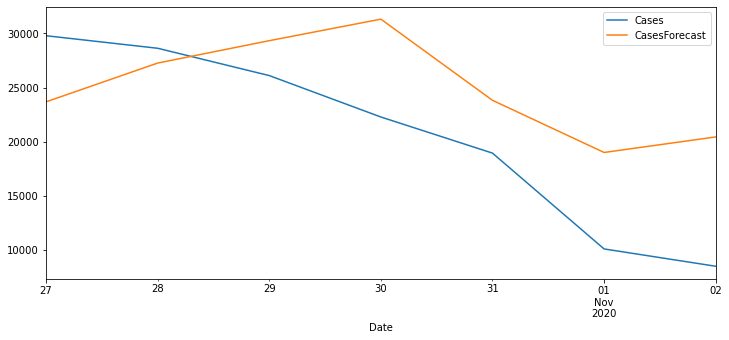

In [21]:
df['Cases'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['CasesForecast'].plot(legend=True);